# Current Visualization Offerring

This is a Reagent Analytics project demo, using the API, to answer questions about foreign influence in various entities in the Harbor open source project.

The `reagentpy` Python package facilitates use of the [Reagent API](https://api.reagentanalytics.com) and querying the Reagent version control intelligence database.

## Import the `Reagent` object

In [8]:
from reagentpy import Reagent

Check the status of the connection.

In [9]:
Reagent().status().dict()

{'status': 'ok'}

Set all required variable names to appropriately constrain query results.  

We're going to show what we can do with Linux for now, but these visualizations should work for all repositories.

In [10]:
repo = "torvalds/linux"
limit = 50
china_tz = 8.0

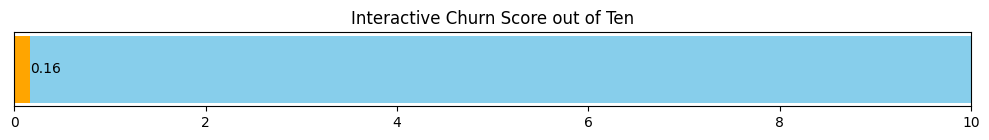

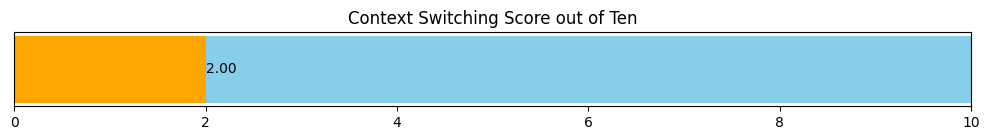

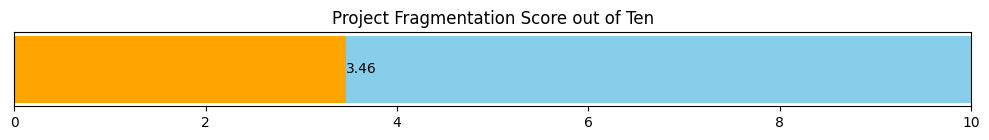

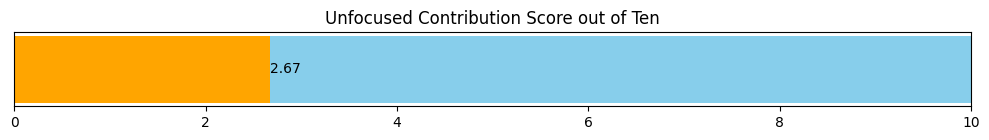

In [11]:
Reagent().demo_visualizations().create_out_of_ten_chart(repo)

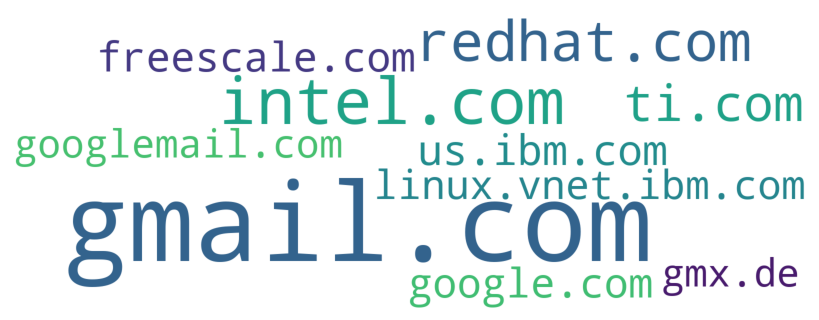

In [12]:
Reagent().demo_visualizations().wordcloud(repo)

In [13]:
Reagent().timezone_visualizations().build_and_show_timezone_map(repo)

Reading timezone geo data...
  Reading timezones from combined-now.json...  Finished in 3.05 seconds.
Plotting timezone map...


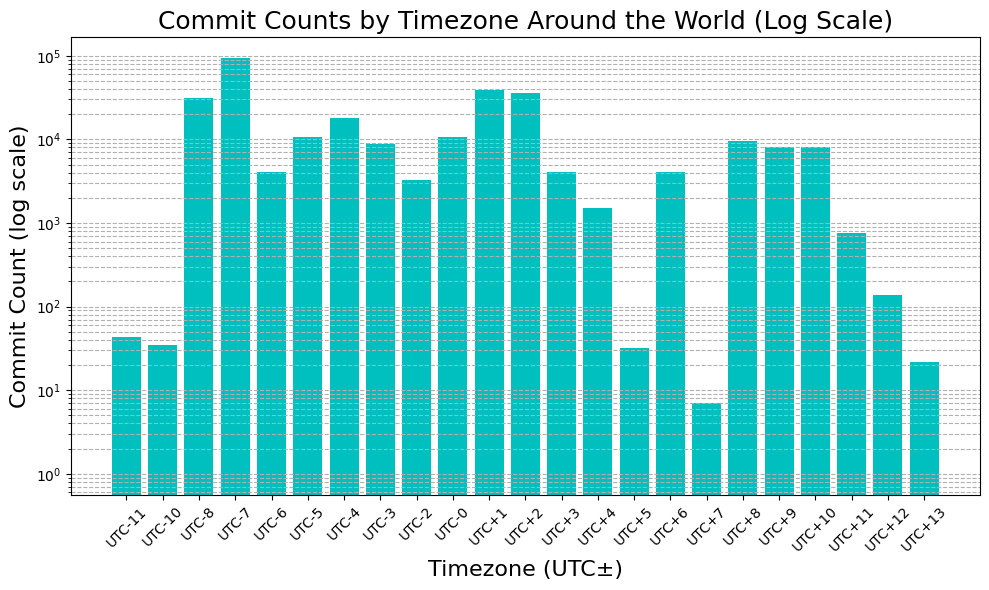

In [14]:
Reagent().timezone_visualizations().show_logarithmic_bar_chart(repo)

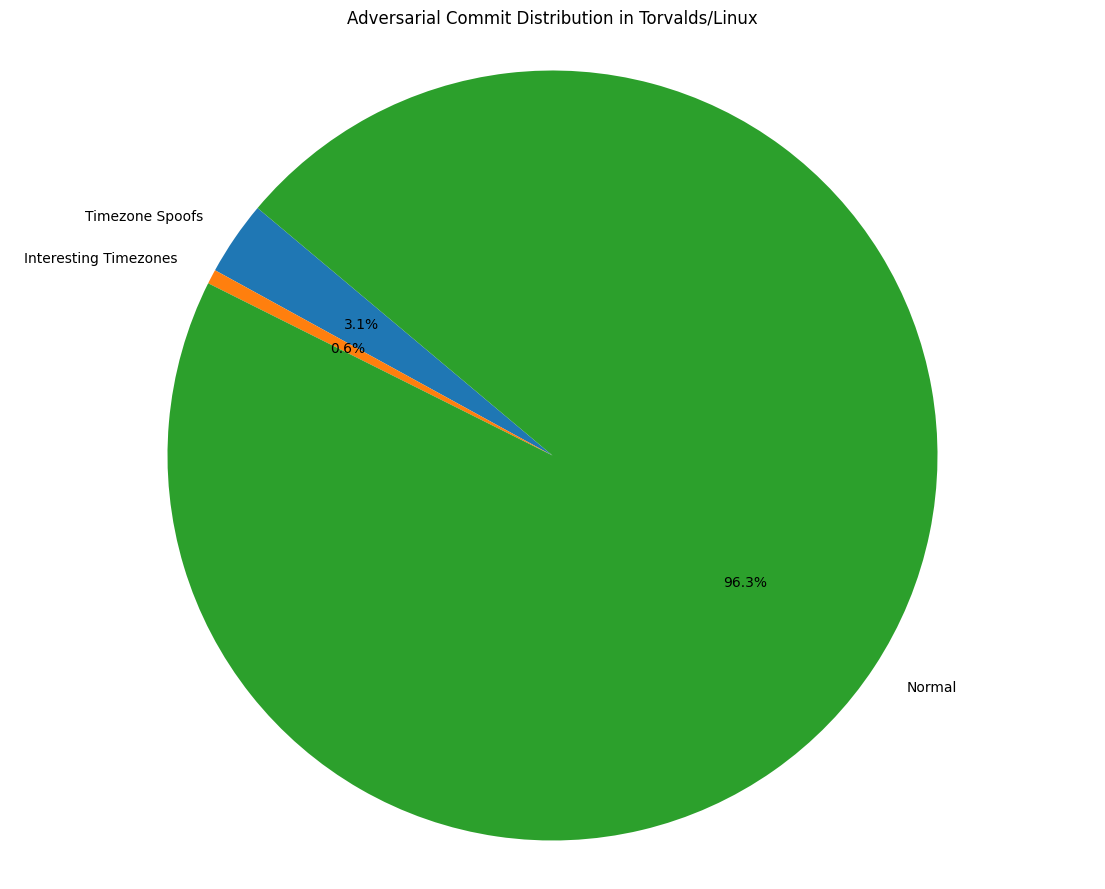

In [15]:
Reagent().demo_visualizations().adversarial_pie_chart(repo)

In [16]:
Reagent().demo_visualizations().print_hygiene_summary(repo)

Repository Overview: torvalds/linux
Description: Linux kernel source tree
Total Contributors: 10743, spanning across 30 timezones, indicating a global contribution pattern.
Fork Count: 52169, showcasing immense community engagement and interest.
License Presence: Present, an necessary aspect of open source contribution.
Readme Presence: Present, vital for repository documentation.
Recent Activity: The repository was last active on 2012-02-28, indicating a stale status.


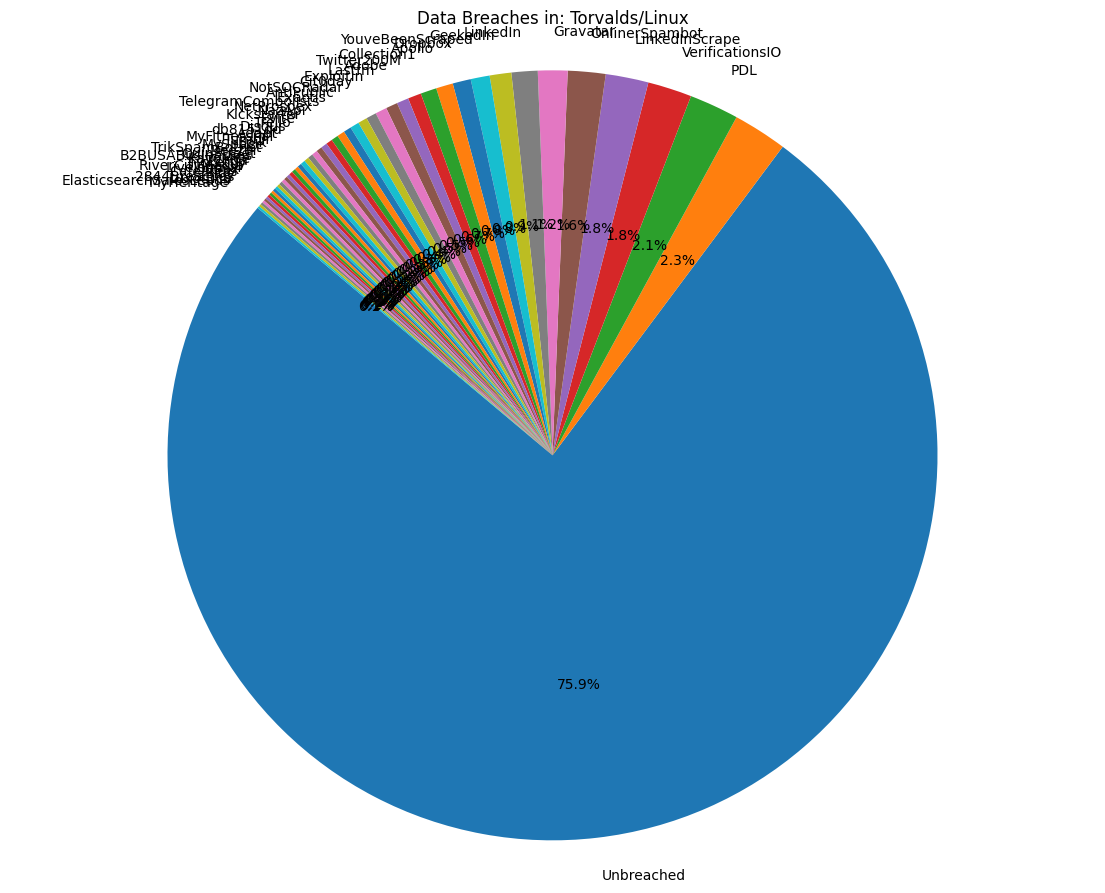

In [17]:
Reagent().demo_visualizations().hibp_pie_chart(repo)

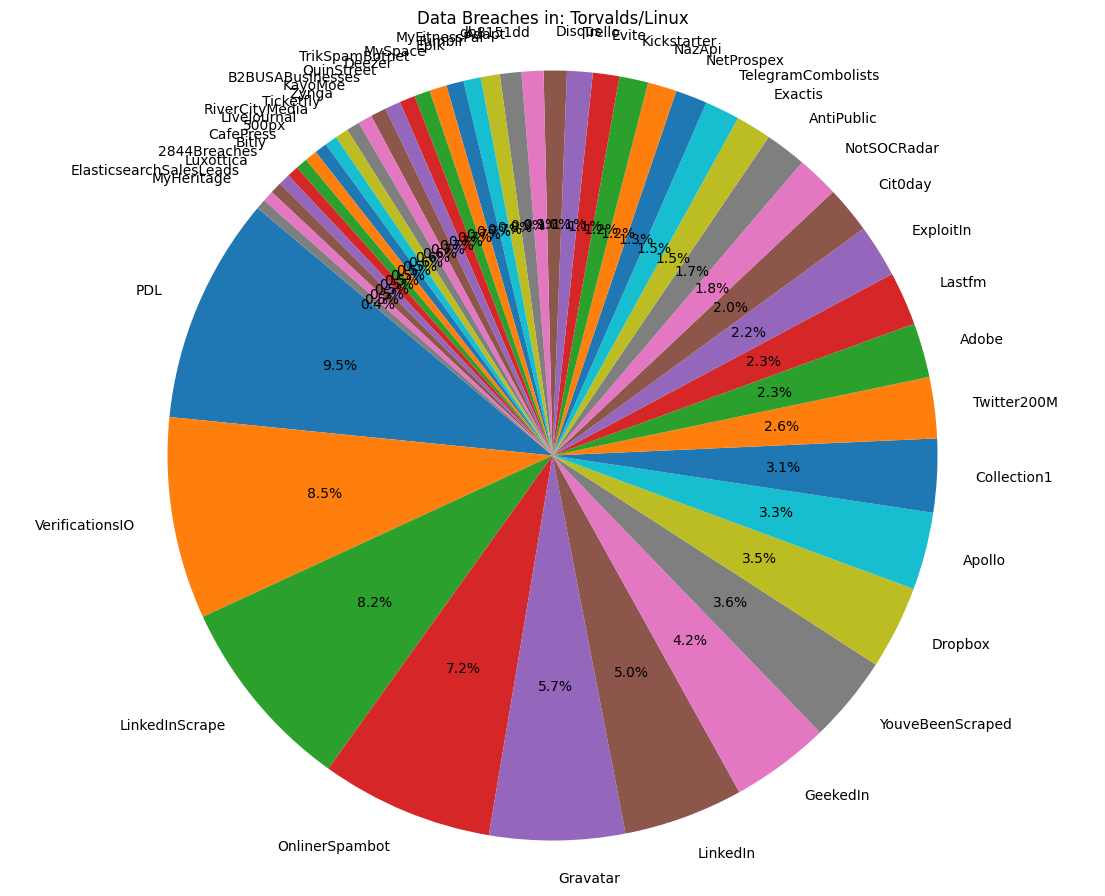

In [18]:
Reagent().demo_visualizations().hibp_pie_chart(repo, True)

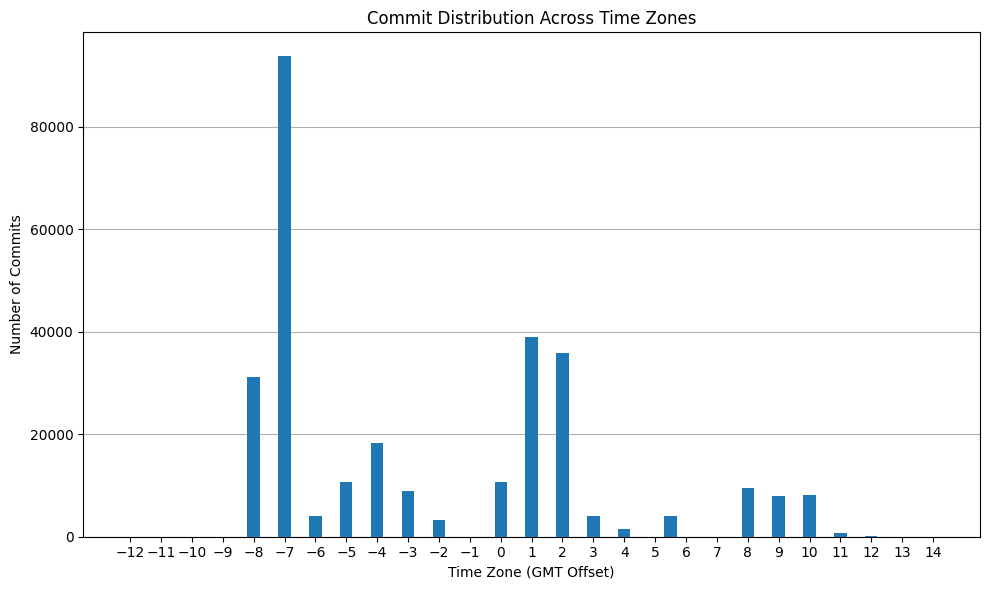

In [19]:
Reagent().timezone_visualizations().plot_timezone_distribution(repo)

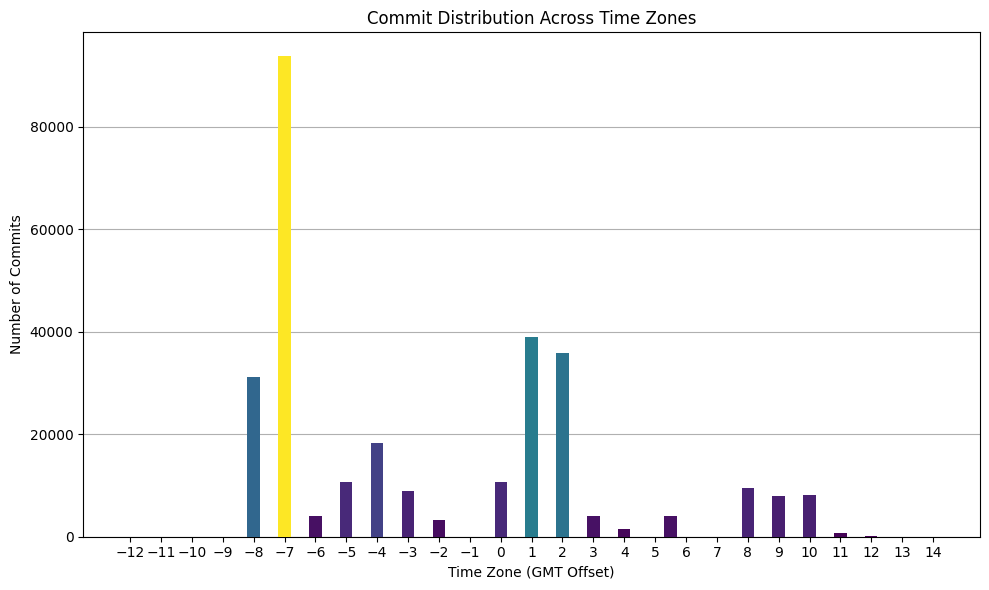

In [20]:
Reagent().timezone_visualizations().plot_timezone_distribution_color(repo)

In [21]:
Reagent().timezone_visualizations().get_top_n_timezones(repo)

' 1.       America/Denver (GMT-7.0): 93763\n 2.          Europe/Rome (GMT+1.0): 39024\n 3.          Europe/Kiev (GMT+2.0): 35820\n 4.  America/Los_Angeles (GMT-8.0): 31088\n 5.      America/Caracas (GMT-4.0): 18222\n 6.        Europe/London (GMT+0.0): 10761\n 7.     America/New_York (GMT-5.0): 10684\n 8.        Asia/Shanghai (GMT+8.0): 9475\n 9. America/Buenos_Aires (GMT-3.0): 8871\n10. Australia/Queensland (GMT+10.0): 8195\n'